In [40]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [41]:
# detection the change
def trigger_detection(data, threshold, start=0, end=-1):
    flag = False
    intervals = []
    if end < start:
        end = data.shape[0] #csvファイルの終わり

    for i in np.arange(start, end): #startからendまで間隔1ずつ
        if (data[i] < threshold): 
            if flag == False: 
                flag = True
                s = i
            else:
                if data[i+1] > threshold:
                    e = i
                    intervals.append((s, e))
                    flag = False
    return np.array(intervals)[:, 0]

In [42]:
# paths were the raw data is パスを調べる
root_path = 'data/'
shimmer_path = os.path.join(root_path, 'Shimmer')

# list all files (ignoring the hidden macos file)
shimmer_files = [x for x in os.listdir(shimmer_path) if x.endswith('.csv')]

In [43]:
shimmer_files

['SS2023_FukuS_Session1_Shimmer_F16C_Calibrated_SD.csv',
 'SS2023_FukuS_Session1_Shimmer_895A_Calibrated_SD.csv',
 'SS2023_FukuS_Session1_Shimmer_F0BA_Calibrated_SD.csv']

In [44]:
# paths
trigger_index = 1
trigger_path = shimmer_files[trigger_index]
emg_path = [x for i,x in enumerate(shimmer_files) if i != trigger_index] 

# paths were the preprocessed data should be
out_path = os.path.join(root_path, 'Segmented')
emg_out_path = os.path.join(out_path, 'EMG')

# check if the output folders exist and create them if necessary
for folder in [out_path, emg_out_path]:
    if not os.path.exists(folder):
        os.mkdir(folder)

In [45]:
# trigger loading and detection
df = pd.read_csv(os.path.join(shimmer_path, trigger_path), skiprows=[0,2])
columns = df.columns

timestamps = np.array(df[columns[0]])
trigger_values = np.array(df[columns[1]])


trigger_pos = trigger_detection(trigger_values, 500, start=168000)
trigger_timestamps = timestamps[trigger_pos]

In [47]:
psychopy_df = pd.read_csv('data/PsychoPy/11111_Fukushima_2023-02-28_18h16.26.652.csv')

In [48]:
# segmenting the Fukushima's EMG data
file_name = ('data/Shimmer/SS2023_FukuS_Session1_Shimmer_F16C_Calibrated_SD.csv')
out_path = os.path.join(emg_out_path, 'SS2023_FukuS_Session1_Shimmer_F16C_Calibrated_SD.csv')

df = pd.read_csv(file_name, skiprows=[0, 2])
columns = df.columns

timestamps = np.array(df[columns[0]])
emg_ch1 = np.array(df[columns[2]])
emg_ch2 = np.array(df[columns[3]])

column_name = []
for i in range(1, 52):
    column_name.append('Action'+ str(i) + '_gt_2')

action_list = []
    
for i, name in enumerate(column_name):
    action_list.append(psychopy_df[name][i+1])

out_timestamps = []
out_ch1 = []
out_ch2 = []
out_order = []
out_actions = []
out_status =[]

start_flag = 0
for i, time in enumerate(trigger_timestamps): 
    if start_flag == 0:
        start_pos = np.argwhere(timestamps >= time)[0, 0] 
        mid_pos = np.argwhere(timestamps >= trigger_timestamps[i+1])[0, 0]
        end_pos = np.argwhere(timestamps >= trigger_timestamps[i+2])[0, 0]

        for pos in range(start_pos, mid_pos):
            out_timestamps.append(timestamps[pos])
            out_ch1.append(emg_ch1[pos])
            out_ch2.append(emg_ch2[pos])
            out_order.append(int(i/3 + 1))
            out_actions.append(int(action_list[int(i/3)]))
            out_status.append(1)

        for pos in range(mid_pos, end_pos):
            out_timestamps.append(timestamps[pos])
            out_ch1.append(emg_ch1[pos])
            out_ch2.append(emg_ch2[pos])
            out_order.append(int(i/3 + 1))
            out_actions.append(int(action_list[int(i/3)]))
            out_status.append(2)
        start_flag = 1

    elif start_flag == 1:
        start_flag = 2
    else:
        start_flag = 0

df = pd.DataFrame({'timestampSync_UNIX': out_timestamps, 'CH1': out_ch1, 'CH2': out_ch2, 'order': out_order, 'actions': out_actions, 'status': out_status})
df.to_csv(out_path)

In [49]:
# segmenting the Otasan'sEMG data
file_name = ('data/Shimmer/SS2023_FukuS_Session1_Shimmer_F0BA_Calibrated_SD.csv')
out_path = os.path.join(emg_out_path, 'SS2023_FukuS_Session1_Shimmer_F0BA_Calibrated_SD.csv')

df = pd.read_csv(file_name, skiprows=[0, 2])
columns = df.columns

timestamps = np.array(df[columns[0]])
emg_ch1 = np.array(df[columns[2]])
emg_ch2 = np.array(df[columns[3]])

column_name = []
for i in range(1, 52):
    column_name.append('Action'+ str(i) + '_gt_1')

action_list = []
    
for i, name in enumerate(column_name):
    action_list.append(psychopy_df[name][i+1])

out_timestamps = []
out_ch1 = []
out_ch2 = []
out_order = []
out_actions = []
out_status =[]

start_flag = 0
for i, time in enumerate(trigger_timestamps): 
    if start_flag == 0:
        start_pos = np.argwhere(timestamps >= time)[0, 0] 
        mid_pos = np.argwhere(timestamps >= trigger_timestamps[i+1])[0, 0]
        end_pos = np.argwhere(timestamps >= trigger_timestamps[i+2])[0, 0]

        for pos in range(start_pos, mid_pos):
            out_timestamps.append(timestamps[pos])
            out_ch1.append(emg_ch1[pos])
            out_ch2.append(emg_ch2[pos])
            out_order.append(int(i/3 + 1))
            out_actions.append(int(action_list[int(i/3)]))
            out_status.append(1)

        for pos in range(mid_pos, end_pos):
            out_timestamps.append(timestamps[pos])
            out_ch1.append(emg_ch1[pos])
            out_ch2.append(emg_ch2[pos])
            out_order.append(int(i/3 + 1))
            out_actions.append(int(action_list[int(i/3)]))
            out_status.append(2)
        start_flag = 1

    elif start_flag == 1:
        start_flag = 2
    else:
        start_flag = 0

df = pd.DataFrame({'timestampSync_UNIX': out_timestamps, 'CH1': out_ch1, 'CH2': out_ch2, 'order': out_order, 'actions': out_actions, 'status': out_status})
df.to_csv(out_path)

In [ ]:
//start mid endで3つのデータに分ける
//labelsはaction じゃんけんの手
//ここのトリガーに一番近いemg timeの位置を調べてる

### Fourier

In [241]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.fft import rfft, irfft, rfftfreq

Text(0.5, 0, 'Frequency (Hz)')

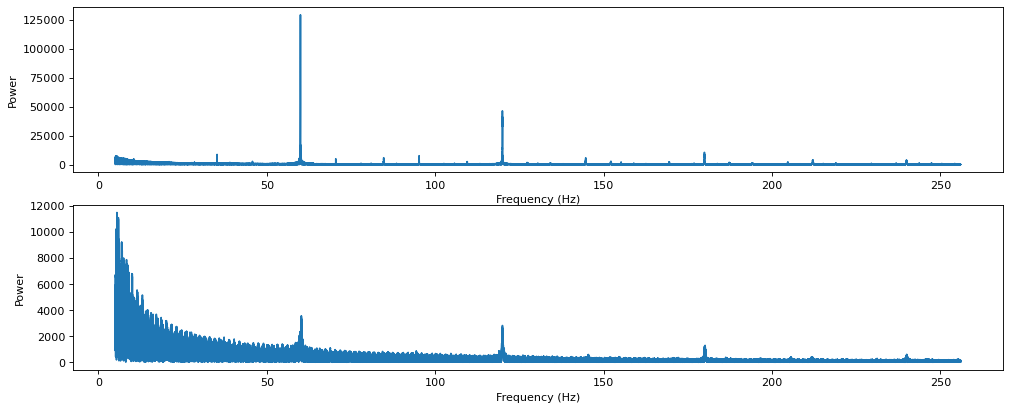

In [242]:
# segmenting the EMG data

file_name = os.path.join(shimmer_path, emg_path[0])

df = pd.read_csv(file_name, skiprows=[0, 2])
columns = df.columns

timestamps = np.array(df[columns[0]])
emg_ch1 = np.array(df[columns[2]])
emg_ch2 = np.array(df[columns[3]])

from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)

# Number of samples in normalized_tone
N_ch1 = emg_ch1.shape[0]
N_ch2 = emg_ch2.shape[0]
sample_rate = 512

yf_ch1 = rfft(emg_ch1)
xf_ch1 = rfftfreq(N_ch1, 1 / sample_rate)

yf_ch2 = rfft(emg_ch2)
xf_ch2 = rfftfreq(N_ch2, 1 / sample_rate)

start_freq = 5
start_pos_ch1 = np.argwhere(xf_ch1 > start_freq)[0, 0]
start_pos_ch2 = np.argwhere(xf_ch2 > start_freq)[0, 0]
plt.subplot(2, 1, 1)
plt.plot(xf_ch1[start_pos_ch1:], np.abs(yf_ch1[start_pos_ch1:]))
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
plt.plot(xf_ch2[start_pos_ch2:], np.abs(yf_ch2[start_pos_ch2:]))
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')